In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import torch
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, 
roc_curve, precision_recall_curve,roc_auc_score,accuracy_score)
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler,SMOTE
rf = RandomForestClassifier()
from sklearn.linear_model import Perceptron

data = pd.read_csv('data/dummy_data.csv',index_col = 0)
data.head()





,convert_30,revenue_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
1,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,0,0
3,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,0,0,1,1,0,0,0,0,0
5,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,1,0,0,1,0,0,0,0,0


In [2]:
target_fields = ['convert_30', 'revenue_30']
features, targets_1, targets_2 = torch.from_numpy(data.drop(target_fields, axis=1).values).float(), data['convert_30'].values,data['revenue_30'].values
sm = SMOTE(random_state=224)
f,t = sm.fit_sample(features, targets_1)
rf.fit(f,t)
rf.feature_importances_

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([3.25217892e-03, 1.03545248e-03, 1.55958518e-03, 2.68120381e-03,
       1.39557307e-03, 2.32465754e-03, 2.41815179e-02, 2.83644889e-03,
       1.43362592e-02, 2.81669248e-03, 1.95334657e-03, 2.59885257e-03,
       5.54176017e-03, 2.84370267e-03, 3.14801861e-03, 2.55064225e-03,
       8.47377781e-03, 2.91664776e-03, 5.56104362e-03, 4.43358366e-03,
       4.14691203e-03, 7.46369188e-03, 1.23485594e-03, 1.76227582e-02,
       1.76577971e-03, 9.63304911e-04, 1.49588201e-02, 2.85083614e-03,
       1.46379891e-03, 2.61896387e-03, 2.20521040e-03, 1.75625937e-03,
       1.13843851e-03, 1.02094897e-03, 9.41227915e-04, 1.66892063e-03,
       9.93495815e-04, 1.34074304e-03, 1.14318430e-03, 8.79640876e-04,
       1.09721172e-03, 1.36441480e-03, 7.18588989e-04, 4.11511160e-03,
       1.73233301e-02, 8.86176149e-03, 8.81424468e-03, 6.47400063e-03,
       4.92977379e-03, 5.74788247e-03, 3.51249171e-03, 1.09340288e-02,
       1.67005763e-02, 5.54234729e-03, 2.96535884e-03, 6.21433849e-03,
      

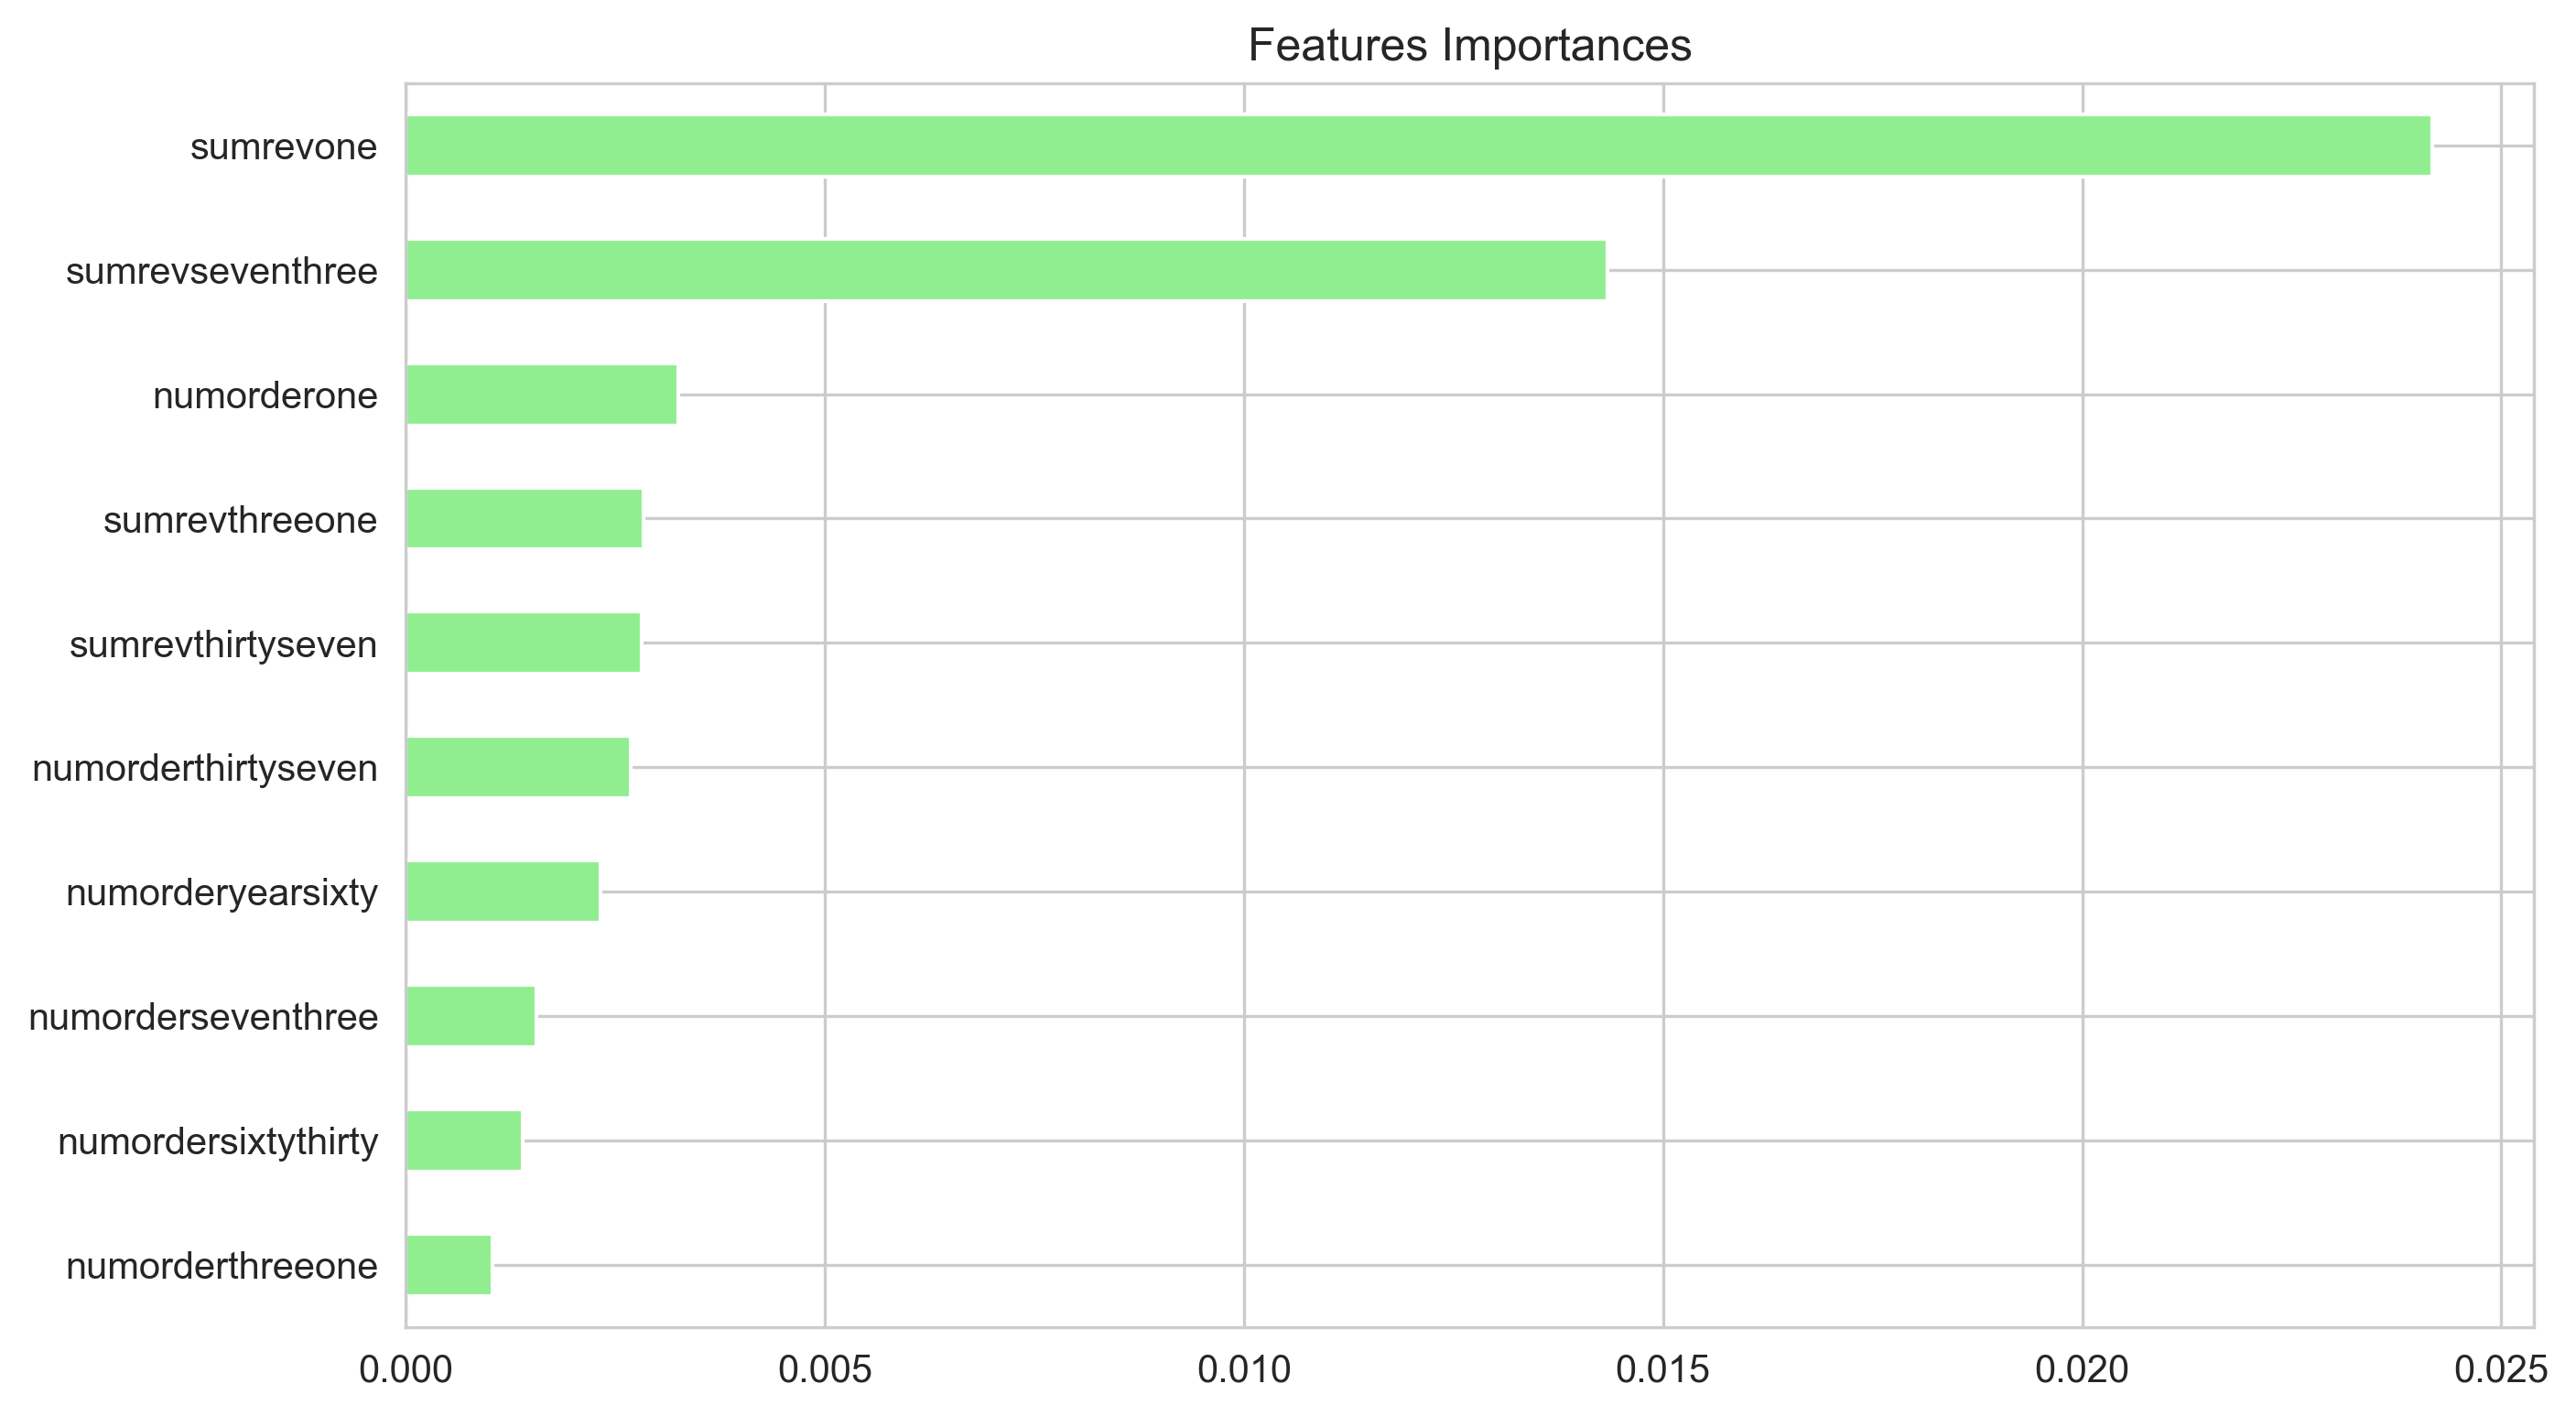

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
importances = pd.Series(data=rf.feature_importances_[:10],
                        index= list(data.columns)[2:][:10])

# Sort importances
importances_sorted = importances.sort_values()
plt.figure(figsize=(10,6),dpi=300)
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [4]:
mask = rf.feature_importances_ > 0.003
features.numpy()[:,mask].shape

(28126, 93)

In [5]:

features = features.numpy()[:,mask]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, targets_1)
sm = SMOTE(random_state=224)
X,y = sm.fit_sample(Xtrain, ytrain)
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
print(lr.score(Xtrain,ytrain))
print(lr.score(Xtest,ytest))



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8970323314686641
0.8987485779294653


In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,ytrain)
print(nb.score(Xtrain,ytrain))
print(nb.score(Xtest,ytest))

0.8616668246894852
0.8600682593856656


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
X_s = scaler.transform(Xtrain)
X_t = scaler.transform(Xtest)

In [8]:
svm = SVC()
svm.fit(X_s,ytrain)
print(svm.score(X_s,ytrain))
print(svm.score(X_t,ytest))

0.9225372143737556
0.8984641638225256


In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(rf, param_grid,cv=5)
grid_search.fit(X_s, ytrain)

# Print the optimal parameters
print(grid_search.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}


In [ ]:
rf = RandomForestClassifier(max_features='sqrt',bootstrap=False,criterion='gini',max_depth=None,)
rf.fit(X_s,ytrain)
print(rf.score(X_s,ytrain))
print(rf.score(X_t,ytest))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.999810372617806
0.8947667804323094


In [ ]:
c_space = np.logspace(-5, 8, 15)
log_grid = {'C': c_space,'penalty': ['l1', 'l2']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, log_grid, cv = 5)

logreg_cv.fit(X_s,ytrain)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
#
#Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l1'}
#Tuned Logistic Regression Accuracy: 1.0

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [ ]:
#SVM
degree = [1,2]
gamma = [.001, .01,]
kernel = ["rbf","poly"]
parameters_svm = {'C':c_space, 'degree': degree, 'gamma':gamma,'kernel':kernel }

svm_cv = GridSearchCV(svm,parameters_svm,cv = 5)
svm_cv.fit(X_s,ytrain)
print("Tuned SVM Parameter: {}".format(svm_cv.best_params))
print("Tuned SVM Accuracy: {}".format(svm_cv.best_score_))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k = [1, 3, 5, 11, 21, 41, 61, 81]
parameters_knn = {'n_neighbors':k}
knn_cv = GridSearchCV(knn,parameters_knn,cv = 5)
knn_cv.fit(X_s,ytrain)
print("Tuned KNN Parameter: {}".format(knn_cv.best_params_))
print("Tuned KNN Accuracy: {}".format(knn_cv.best_score_))

In [ ]:
from sklearn.linear_model import Perceptron
per = Perceptron(tol=1e-3, random_state=42)
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
parameters_per = {'alpha':alpha}
per_cv = GridSearchCV(per,parameters_per,cv = 5)
per_cv.fit(X_s,ytrain)
print("Tuned Perceptron Parameter: {}".format(per_cv.best_params_))
print("Tuned Perceptron Accuracy: {}".format(per_cv.best_score_))


In [ ]:
lr = LogisticRegression(C= 0.0007196856730011522, penalty= 'l1')# logistics
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=41)
nb = GaussianNB()
rf = RandomForestClassifier(max_features='sqrt',bootstrap=False,criterion='gini',max_depth=None,)
per = Perceptron(alpha = 1e-06)


In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('RandomForest', rf),
               ('SVM',svm),('Perceptron',per)]


for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_s, ytrain)    
  
    # Predict y_pred
    y_pred = clf.predict(X_t)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    print(classification_report(ytest,y_pred))

## predict for the final answer

In [ ]:
holdout = pd.read_csv('df_holdout_scholarjet.csv',index_col=0)
holdout.head()
holdout = holdout.replace('NaN',np.NaN)
holdout.fillna(holdout.mean(), inplace=True)
print(holdout.isnull().sum())

In [ ]:
dummy_fields = ['roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']

for each in dummy_fields:
    dummies = pd.get_dummies(holdout[each], prefix=each, drop_first=False)

    holdout = pd.concat([holdout, dummies], axis=1)
holdout.shape    

In [ ]:
fields_to_drop = ['cuid', 'roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']
testdata = holdout.drop(fields_to_drop, axis=1)



In [ ]:
X = testdata.iloc[:,mask]
X.shape

In [ ]:
Xpr = scaler.transform(X)


In [ ]:
pr1 = rf.predict(Xpr)
pr2 = lr.predict(Xpr)
pr3 = knn.predict(Xpr)
pr4 = svm.predict(Xpr)
pr5 = per.predict(Xpr)

In [ ]:
fia = pr1+pr6+pr3+pr4+pr5

In [ ]:
anss = [1 if i >=2 else 0 for i in fia]

In [ ]:
nb.fit(X_s,ytrain)
pr6 = nb.predict(Xpr)

In [ ]:
Counter(anss)

In [ ]:
submission = pd.read_csv('df_holdout_scholarjet.csv',index_col=0)
answer = submission[['cuid']]


In [ ]:
answer['pred_convert_30'] = anss

In [ ]:
answer.head()
answer.to_csv('final_answer_need.csv')